In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Read the output file #   
df = pd.read_csv('hercules_output.csv', index_col=False)
df.head()

,dt,hercules_comms.amr_wind.wind_farm_0.num_turbines,hercules_comms.amr_wind.wind_farm_0.rotor_diameter,hercules_comms.amr_wind.wind_farm_0.turbine_powers.000,hercules_comms.amr_wind.wind_farm_0.turbine_powers.001,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001,hercules_comms.amr_wind.wind_farm_0.wind_direction,hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind,hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.000,...,py_sims.solar_farm_0.initial_conditions.power,py_sims.solar_farm_0.initial_conditions.irradiance,py_sims.solar_farm_0.outputs.power,py_sims.solar_farm_0.outputs.dc_power,py_sims.solar_farm_0.outputs.irradiance,py_sims.solar_farm_0.outputs.aoi,py_sims.inputs.available_power,py_sims.inputs.sim_time_s,time,clock_time
0,0.5,2,240.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,...,25,1000,28.370887,29.332813,330.860199,41.479017,0.000000,0.0,0.0,2023-12-14 15:27:45.507177
1,0.5,2,240.0,0.000000,0.000000,0.00,0.00,-1.0,0.0,-1.0,...,25,1000,28.370887,29.332813,330.860199,41.479017,0.000000,0.0,0.5,2023-12-14 15:27:45.642255
2,0.5,2,240.0,0.000000,0.000000,0.00,0.00,-1.0,0.0,-1.0,...,25,1000,28.370887,29.332813,330.860199,41.479017,0.000000,0.0,1.0,2023-12-14 15:27:45.736872
3,0.5,2,240.0,554.204417,386.011507,0.01,0.02,240.0,0.0,240.0,...,25,1000,28.370887,29.332813,330.860199,41.479017,940.215924,0.0,1.5,2023-12-14 15:27:45.832896
4,0.5,2,240.0,554.204417,386.011507,0.01,0.02,240.0,0.0,240.0,...,25,1000,28.370887,29.332813,330.860199,41.479017,940.215924,0.0,2.0,2023-12-14 15:27:45.926730


In [27]:
df.columns

Index(['dt', 'hercules_comms.amr_wind.wind_farm_0.num_turbines',
       'hercules_comms.amr_wind.wind_farm_0.rotor_diameter',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.001',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001',
       'hercules_comms.amr_wind.wind_farm_0.wind_direction',
       'hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.001',
       'hercules_comms.helics.config.use_dash_frontend',
       'hercules_comms.helics.config.KAFKA',
       'hercules_comms.helics.config.helics.helicsport',
       'hercules_comms.helics.config.helics.deltat',
       'hercules_comms.helics.config.publication_interval',
       'hercules_comms.helics.config.endpoint_interval',
  

Text(0.5, 0, 'time [hr]')

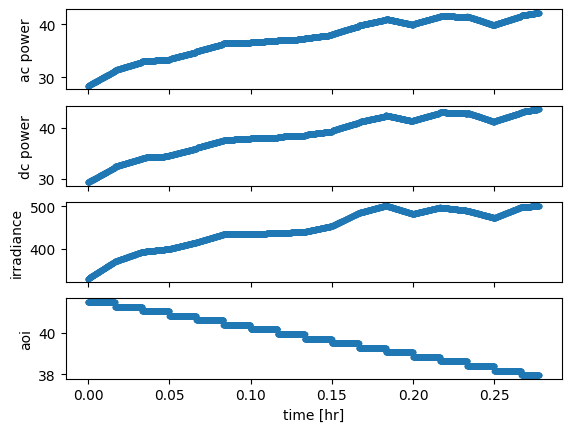

In [28]:
# first test solar module outputs
time = df['hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind']

ac_power = df['py_sims.solar_farm_0.outputs.power']
dc_power = df['py_sims.solar_farm_0.outputs.dc_power']
aoi = df['py_sims.solar_farm_0.outputs.aoi']
irradiance = df['py_sims.solar_farm_0.outputs.irradiance']

fig, ax = plt.subplots(4, 1, sharex="col") #, figsize=[6,5], dpi=250)

ax[0].plot(time/3600, ac_power, '.-', label="power")
ax[0].set_ylabel('ac power')
# ax[0].legend()

ax[1].plot(time/3600, dc_power, '.-', label="dc power")
ax[1].set_ylabel('dc power')

ax[2].plot(time/3600, irradiance, '.-', label="irradiance")
ax[2].set_ylabel('irradiance')
# ax[1].legend()

ax[3].plot(time/3600, aoi, '.-', label="aoi")
ax[3].set_ylabel('aoi')
ax[-1].set_xlabel('time [hr]')

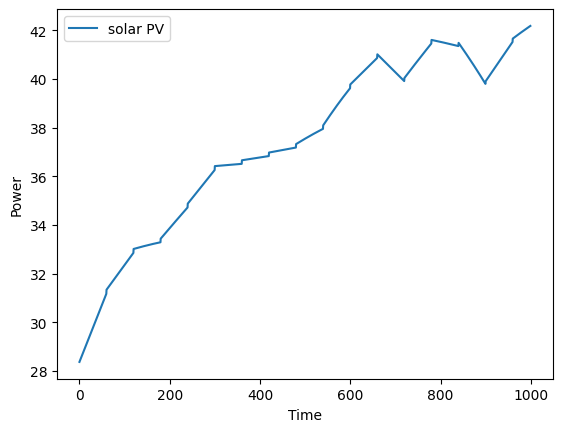

In [29]:
plt.figure()
time = df['hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind']
plt.plot(time,df['py_sims.solar_farm_0.outputs.power'],label='solar PV')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()

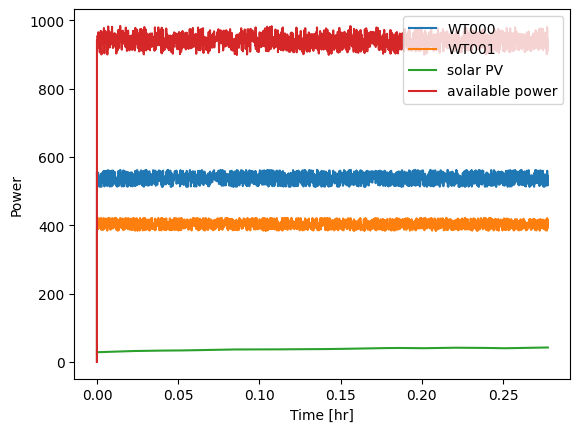

In [30]:
plt.figure()
plt.plot(time/3600,df['hercules_comms.amr_wind.wind_farm_0.turbine_powers.000'],label='WT000')
plt.plot(time/3600,df['hercules_comms.amr_wind.wind_farm_0.turbine_powers.001'],label='WT001')
plt.plot(time/3600,df['py_sims.solar_farm_0.outputs.power'],label='solar PV')
plt.plot(time/3600,df['py_sims.inputs.available_power'],label='available power')
plt.ylabel('Power')
plt.xlabel('Time [hr]')
plt.legend()